# BI MINI PROJECT  

# Title : Social Psychology

The Dataset is about influence of the social media and responses of todays generation from various choice based questions asked by us , referring to their social media activeness , their social charachter such as introvertism or extrovertism .
their response on the choice selection based questions .

In [91]:
pwd

'c:\\Users\\sidhe\\OneDrive\\Pictures\\Desktop\\EDA\\EDA-PHYCOLOGY'

In [92]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [93]:
dataset = pd.read_csv("res.csv") #reading the dataset pub_rev which is data collected from the social pschology survey 

In [94]:
dataset #printing dataset to check its rows and columns 

,Timestamp,Name,Age,gender,insta,fb,snapct,linkdn,telegm,personality,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,NaN,Josh,20.0,Male,Yes,Yes,Yes,Yes,Yes,Not interested to answer,...,Yes,Yes,Yes,No,Yes,Yes,Money Matters bro !,Books,HollyWood,Play
1,NaN,Yash,20.0,Male,Yes,Yes,Yes,Yes,Yes,Introvert,...,Yes,Yes,Yes,Yes,Yes,Yes,For sure it's Love,Books,HollyWood,Play
2,NaN,Bhavya,20.0,Male,Yes,No,No,No,No,Not interested to answer,...,No,Maybe,No,Depends,No,No,Money Matters bro !,Clubs,South is Best re,Watch
3,NaN,Anonymous,21.0,Male,Yes,Yes,No,Yes,Yes,Extrovert,...,Yes,Yes,Yes,Depends,Yes,No,Money Matters bro !,Books,HollyWood,Play
4,NaN,Aadesh jain,21.0,Male,Yes,Yes,Yes,No,Yes,Extrovert,...,Yes,Yes,Yes,Yes,Yes,Yes,Money Matters bro !,Clubs,Bollywood,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,NaN,Kedar,25.0,Male,No,No,Yes,Yes,Yes,Extrovert,...,Yes,Maybe,No,Yes,Yes,Yes,For sure it's Love,Books,HollyWood,Play
1446,NaN,Mandakini,17.0,Female,Yes,No,No,Yes,Yes,Extrovert,...,Yes,Yes,Yes,Depends,No,No,For sure it's Love,Books,HollyWood,Watch
1447,NaN,Taruna,21.0,Female,Yes,No,Yes,Yes,Yes,Introvert,...,Yes,No,No,Depends,No,Yes,For sure it's Love,Clubs,South is Best re,Watch
1448,NaN,Shreyansh,29.0,Male,Yes,Yes,Yes,Yes,Yes,Introvert,...,No,Yes,No,No,No,Yes,Money Matters bro !,Books,Bollywood,Watch


CLEANING DATASET 

In [95]:
dataset.drop(columns = ["Timestamp"],inplace=True) #dropping the timestamp column 

In [96]:
dataset.drop(columns = ["Name "],inplace=True) #dropping the name column 

In [97]:
dataset.shape #looking the shape of the dataset 

(1450, 29)

In [98]:
dataset.describe #desctption format for every column in the dataset 

<bound method NDFrame.describe of        Age  gender insta   fb snapct linkdn telegm               personality  \
0     20.0    Male   Yes  Yes    Yes    Yes    Yes  Not interested to answer   
1     20.0    Male   Yes  Yes    Yes    Yes    Yes                 Introvert   
2     20.0    Male   Yes   No     No     No     No  Not interested to answer   
3     21.0    Male   Yes  Yes     No    Yes    Yes                 Extrovert   
4     21.0    Male   Yes  Yes    Yes     No    Yes                 Extrovert   
...    ...     ...   ...  ...    ...    ...    ...                       ...   
1445  25.0    Male    No   No    Yes    Yes    Yes                 Extrovert   
1446  17.0  Female   Yes   No     No    Yes    Yes                 Extrovert   
1447  21.0  Female   Yes   No    Yes    Yes    Yes                 Introvert   
1448  29.0    Male   Yes  Yes    Yes    Yes    Yes                 Introvert   
1449   NaN     NaN   NaN  Yes    Yes    Yes    Yes                 Introvert   

     

In [99]:
dataset.index #index start and stop size of the dataset

RangeIndex(start=0, stop=1450, step=1)

In [100]:
dataset.columns #ckeckinh the column name for the data present in our dataset 

Index(['Age', 'gender', 'insta', 'fb', 'snapct', 'linkdn', 'telegm',
       'personality', 'time_hr', 'netflix', 'prime', 'torrent', 'impact',
       'nature', 'travel', 'sleep_time', 'music', 'weekend', 'emotions',
       'food', 'looks', 'health', 'religious', 'enjoy', 'lottery',
       'love_money', 'book_club', 'movie', 'sports'],
      dtype='object')

In [101]:
dataset.isnull().sum() #check for the null values in our dataset and summing all of them to get the total count of all the null elements

Age            1
gender         1
insta          1
fb             0
snapct         0
linkdn         0
telegm         0
personality    0
time_hr        0
netflix        0
prime          0
torrent        0
impact         0
nature         0
travel         0
sleep_time     0
music          0
weekend        0
emotions       0
food           0
looks          0
health         0
religious      0
enjoy          0
lottery        0
love_money     0
book_club      0
movie          0
sports         0
dtype: int64

In [102]:
dataset.dropna(inplace=True) #dropping the null values from the dataset 
dataset.isnull().sum() #checking the dataset after removing the null values 

Age            0
gender         0
insta          0
fb             0
snapct         0
linkdn         0
telegm         0
personality    0
time_hr        0
netflix        0
prime          0
torrent        0
impact         0
nature         0
travel         0
sleep_time     0
music          0
weekend        0
emotions       0
food           0
looks          0
health         0
religious      0
enjoy          0
lottery        0
love_money     0
book_club      0
movie          0
sports         0
dtype: int64

In [149]:
dataset.shape #new shape of the dataset after removal of the null values from the dataset 

(1449, 29)

In [104]:
dataset["Age"].astype(int)

0       20
1       20
2       20
3       21
4       21
        ..
1444    30
1445    25
1446    17
1447    21
1448    29
Name: Age, Length: 1449, dtype: int64

In [105]:
dataset.head() #first 5 elements of the dataset after data cleaning 

,Age,gender,insta,fb,snapct,linkdn,telegm,personality,time_hr,netflix,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,20.0,Male,Yes,Yes,Yes,Yes,Yes,Not interested to answer,More than 2 Hr,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Money Matters bro !,Books,HollyWood,Play
1,20.0,Male,Yes,Yes,Yes,Yes,Yes,Introvert,1 Hr to 2 Hr,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,For sure it's Love,Books,HollyWood,Play
2,20.0,Male,Yes,No,No,No,No,Not interested to answer,More than 2 Hr,Yes,...,No,Maybe,No,Depends,No,No,Money Matters bro !,Clubs,South is Best re,Watch
3,21.0,Male,Yes,Yes,No,Yes,Yes,Extrovert,More than 2 Hr,Yes,...,Yes,Yes,Yes,Depends,Yes,No,Money Matters bro !,Books,HollyWood,Play
4,21.0,Male,Yes,Yes,Yes,No,Yes,Extrovert,More than 2 Hr,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Money Matters bro !,Clubs,Bollywood,Play


In [106]:
# Reading Specific Columns to check its output after data cleaning 
print (dataset.loc[:,['insta','fb','snapct','linkdn','telegm']])

     insta   fb snapct linkdn telegm
0      Yes  Yes    Yes    Yes    Yes
1      Yes  Yes    Yes    Yes    Yes
2      Yes   No     No     No     No
3      Yes  Yes     No    Yes    Yes
4      Yes  Yes    Yes     No    Yes
...    ...  ...    ...    ...    ...
1444   Yes   No     No    Yes    Yes
1445    No   No    Yes    Yes    Yes
1446   Yes   No     No    Yes    Yes
1447   Yes   No    Yes    Yes    Yes
1448   Yes  Yes    Yes    Yes    Yes

[1449 rows x 5 columns]


In [107]:
i=pd.crosstab(dataset['nature'],dataset['Age'])
i

Age,8.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,...,37.0,38.0,39.0,45.0,46.0,48.0,55.0,56.0,60.0,61.0
nature,,,,,,,,,,,,,,,,,,,,,
Angry,0,9,9,12,16,28,22,20,18,27,...,1,0,0,1,0,0,1,1,0,1
Balanced,0,8,13,22,28,39,20,25,17,25,...,0,0,0,0,0,0,0,0,0,0
Calm,0,9,12,13,12,26,25,29,30,30,...,1,1,2,2,0,0,0,0,0,0
Emotional,1,8,7,14,16,28,30,31,27,22,...,0,1,0,0,1,1,1,1,0,0
Submissive,0,9,9,18,12,11,27,27,32,28,...,0,0,0,0,0,0,0,0,1,0


DATA ENCODING / TRANSFORMATION

For us it is very important to transform the data in the form of either 0 ,1 or True , False for implementing Apriori and Fp growth on the dataset 

In [108]:
from sklearn import preprocessing #importing sklearn 

In [109]:
X=dataset.iloc[:,] #locking entire datset with a new name X 
X

,Age,gender,insta,fb,snapct,linkdn,telegm,personality,time_hr,netflix,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,20.0,Male,Yes,Yes,Yes,Yes,Yes,Not interested to answer,More than 2 Hr,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Money Matters bro !,Books,HollyWood,Play
1,20.0,Male,Yes,Yes,Yes,Yes,Yes,Introvert,1 Hr to 2 Hr,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,For sure it's Love,Books,HollyWood,Play
2,20.0,Male,Yes,No,No,No,No,Not interested to answer,More than 2 Hr,Yes,...,No,Maybe,No,Depends,No,No,Money Matters bro !,Clubs,South is Best re,Watch
3,21.0,Male,Yes,Yes,No,Yes,Yes,Extrovert,More than 2 Hr,Yes,...,Yes,Yes,Yes,Depends,Yes,No,Money Matters bro !,Books,HollyWood,Play
4,21.0,Male,Yes,Yes,Yes,No,Yes,Extrovert,More than 2 Hr,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Money Matters bro !,Clubs,Bollywood,Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,30.0,Male,Yes,No,No,Yes,Yes,Introvert,More than 2 Hr,Yes,...,Yes,Maybe,Yes,Depends,No,No,For sure it's Love,Books,Bollywood,Play
1445,25.0,Male,No,No,Yes,Yes,Yes,Extrovert,Less than 1 Hr,Yes,...,Yes,Maybe,No,Yes,Yes,Yes,For sure it's Love,Books,HollyWood,Play
1446,17.0,Female,Yes,No,No,Yes,Yes,Extrovert,More than 2 Hr,No,...,Yes,Yes,Yes,Depends,No,No,For sure it's Love,Books,HollyWood,Watch
1447,21.0,Female,Yes,No,Yes,Yes,Yes,Introvert,Less than 1 Hr,Yes,...,Yes,No,No,Depends,No,Yes,For sure it's Love,Clubs,South is Best re,Watch


In [110]:
# transforming entire datset in the numeric values so it will be easier for generating various plotting diagrams 

In [111]:
le=preprocessing.LabelEncoder()
X=X.apply(le.fit_transform).head()
dataset.insta = le.fit_transform(dataset.insta)
dataset.fb = le.fit_transform(dataset.fb)
dataset.snapct = le.fit_transform(dataset.snapct)
dataset.linkdn = le.fit_transform(dataset.linkdn)
dataset.telegm = le.fit_transform(dataset.telegm)
dataset.personality = le.fit_transform(dataset.personality)
dataset.time_hr = le.fit_transform(dataset.time_hr)
dataset.netflix = le.fit_transform(dataset.netflix)
dataset.prime = le.fit_transform(dataset.prime)
dataset.torrent = le.fit_transform(dataset.torrent)
dataset.impact = le.fit_transform(dataset.impact)
dataset.nature = le.fit_transform(dataset.nature)
dataset.travel = le.fit_transform(dataset.travel)
dataset.sleep_time = le.fit_transform(dataset.sleep_time)
dataset.music = le.fit_transform(dataset.music)
dataset.weekend = le.fit_transform(dataset.weekend)
dataset.emotions = le.fit_transform(dataset.emotions)
dataset.food = le.fit_transform(dataset.food)
dataset.looks = le.fit_transform(dataset.looks)
dataset.health = le.fit_transform(dataset.health)
dataset.religious = le.fit_transform(dataset.religious)
dataset.enjoy = le.fit_transform(dataset.enjoy)
dataset.lottery = le.fit_transform(dataset.lottery)
dataset.love_money = le.fit_transform(dataset.love_money)
dataset.book_club = le.fit_transform(dataset.book_club)
dataset.movie = le.fit_transform(dataset.movie)
dataset.sports = le.fit_transform(dataset.sports)
dataset.gender = le.fit_transform(dataset.gender)

In [112]:
dataset.head() #displaying first 5 elements after data transformation

,Age,gender,insta,fb,snapct,linkdn,telegm,personality,time_hr,netflix,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,20.0,1,1,1,1,1,1,2,2,1,...,1,2,1,1,1,1,1,0,1,0
1,20.0,1,1,1,1,1,1,1,0,1,...,1,2,1,2,1,1,0,0,1,0
2,20.0,1,1,0,0,0,0,2,2,1,...,0,0,0,0,0,0,1,1,2,1
3,21.0,1,1,1,0,1,1,0,2,1,...,1,2,1,0,1,0,1,0,1,0
4,21.0,1,1,1,1,0,1,0,2,1,...,1,2,1,2,1,1,1,1,0,0


In [113]:
correlations = dataset.corr() #correlating the dataset 

<Axes: >

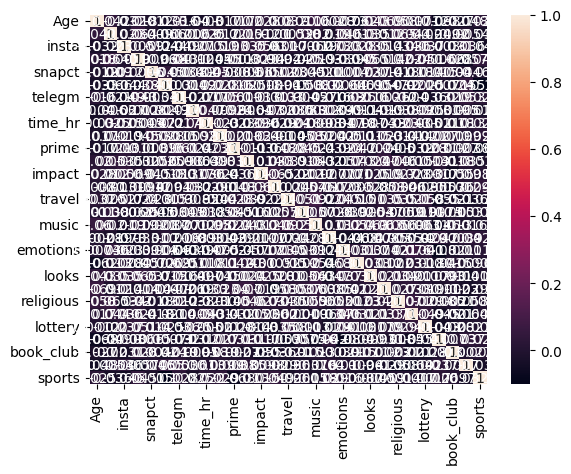

In [114]:
sns.heatmap(correlations, annot = True) #displaying heatmap 
#plt.savefig('heatmap.pdf')  

TRANSFORMATION TECHNIQUES 

In [115]:
from sklearn.preprocessing import StandardScaler #standard scaler 
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.81649658,  0.        ,  0.        ,  0.5       ,  0.81649658,
         0.81649658,  0.5       ,  1.11803399,  0.5       ,  0.        ,
         0.        ,  1.22474487,  0.5       ,  0.17149859,  0.        ,
        -1.22474487,  0.        , -0.5       , -1.22474487,  0.5       ,
         0.5       ,  0.5       ,  0.        ,  0.5       ,  0.81649658,
         0.5       , -0.81649658,  0.        , -0.5       ],
       [-0.81649658,  0.        ,  0.        ,  0.5       ,  0.81649658,
         0.81649658,  0.5       ,  0.        , -2.        ,  0.        ,
         0.        ,  1.22474487,  0.5       , -1.54348727,  0.        ,
         0.81649658,  0.        ,  2.        ,  0.81649658,  0.5       ,
         0.5       ,  0.5       ,  1.11803399,  0.5       ,  0.81649658,
        -2.        , -0.81649658,  0.        , -0.5       ],
       [-0.81649658,  0.        ,  0.        , -2.        , -1.22474487,
        -1.22474487, -2.        ,  1.11803399,  0.5       ,  0.        ,
  

In [116]:
#min max normalzition
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X= min_max.fit_transform(X)
X

array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.66666667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.5       , 1.        , 1.        ,
        1.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 0.5       , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.33333333, 0.        ,
  

In [117]:
Y=dataset.iloc[:,] #locking dataset for transformation in one hot encoder 
Y

,Age,gender,insta,fb,snapct,linkdn,telegm,personality,time_hr,netflix,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,20.0,1,1,1,1,1,1,2,2,1,...,1,2,1,1,1,1,1,0,1,0
1,20.0,1,1,1,1,1,1,1,0,1,...,1,2,1,2,1,1,0,0,1,0
2,20.0,1,1,0,0,0,0,2,2,1,...,0,0,0,0,0,0,1,1,2,1
3,21.0,1,1,1,0,1,1,0,2,1,...,1,2,1,0,1,0,1,0,1,0
4,21.0,1,1,1,1,0,1,0,2,1,...,1,2,1,2,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,30.0,1,1,0,0,1,1,1,2,1,...,1,0,1,0,0,0,0,0,0,0
1445,25.0,1,0,0,1,1,1,0,1,1,...,1,0,0,2,1,1,0,0,1,0
1446,17.0,0,1,0,0,1,1,0,2,0,...,1,2,1,0,0,0,0,0,1,1
1447,21.0,0,1,0,1,1,1,1,1,1,...,1,1,0,0,0,1,0,1,2,1


In [118]:
#Data transformation one hot encoder 
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
enc.fit_transform(Y).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(1449, 99))

DATA VISUALIZATION IN JUPYTER

Data visualization is one of a highly important aspect of data science and data analyst , we have visualized data on R studios , Jyputer as well as Tableau for a better understanding on the Dataset and to understand the utilization of Visualization tool for future purpose 

(array([ 355.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'People Who Use ')

Text(0.5, 0, 'not users / active users')

Text(0, 0.5, 'total of users')

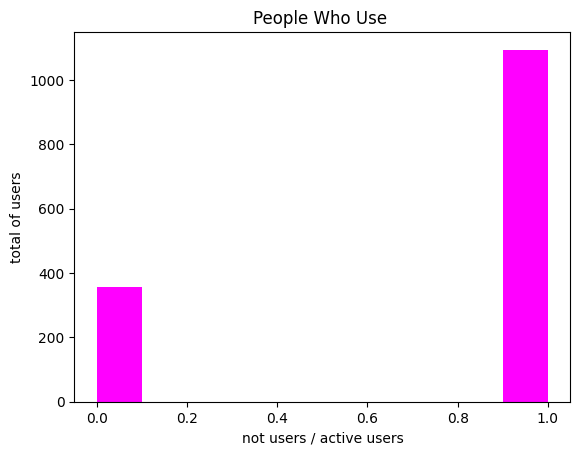

<Figure size 640x480 with 0 Axes>

In [150]:
plt.hist(dataset['insta'],color='magenta',orientation='vertical') #histogram with help of matplotlib 
plt.title('People Who Use ')
plt.xlabel('not users / active users')
plt.ylabel('total of users')
plt.show()
plt.savefig('insta1.png', dpi=300)  
plt.savefig('insta1.pdf')  

<Axes: xlabel='insta', ylabel='Density'>

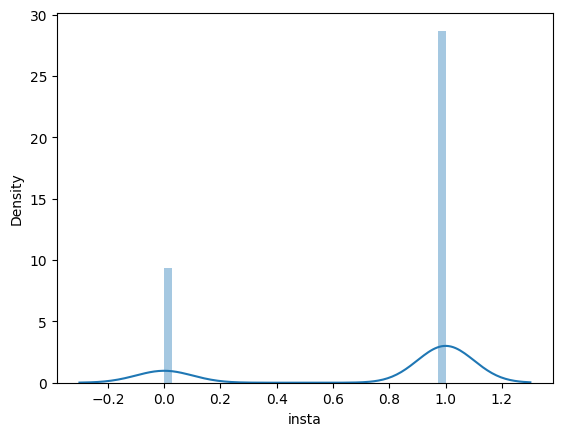

In [120]:
sns.distplot(dataset["insta"]) #histogram with help of Seaborn
plt.savefig('insta.png')
plt.savefig('insta.pdf')

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [121]:
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import squarify
import matplotlib

In [122]:
dataset

,Age,gender,insta,fb,snapct,linkdn,telegm,personality,time_hr,netflix,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,20.0,1,1,1,1,1,1,2,2,1,...,1,2,1,1,1,1,1,0,1,0
1,20.0,1,1,1,1,1,1,1,0,1,...,1,2,1,2,1,1,0,0,1,0
2,20.0,1,1,0,0,0,0,2,2,1,...,0,0,0,0,0,0,1,1,2,1
3,21.0,1,1,1,0,1,1,0,2,1,...,1,2,1,0,1,0,1,0,1,0
4,21.0,1,1,1,1,0,1,0,2,1,...,1,2,1,2,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,30.0,1,1,0,0,1,1,1,2,1,...,1,0,1,0,0,0,0,0,0,0
1445,25.0,1,0,0,1,1,1,0,1,1,...,1,0,0,2,1,1,0,0,1,0
1446,17.0,0,1,0,0,1,1,0,2,0,...,1,2,1,0,0,0,0,0,1,1
1447,21.0,0,1,0,1,1,1,1,1,1,...,1,1,0,0,0,1,0,1,2,1


In [123]:
dataset.to_csv("preproc.csv") #download the preprocessed csv 

APRIORI ALGORITHM

In [124]:
dataset.head() #dataset head 

,Age,gender,insta,fb,snapct,linkdn,telegm,personality,time_hr,netflix,...,food,looks,health,religious,enjoy,lottery,love_money,book_club,movie,sports
0,20.0,1,1,1,1,1,1,2,2,1,...,1,2,1,1,1,1,1,0,1,0
1,20.0,1,1,1,1,1,1,1,0,1,...,1,2,1,2,1,1,0,0,1,0
2,20.0,1,1,0,0,0,0,2,2,1,...,0,0,0,0,0,0,1,1,2,1
3,21.0,1,1,1,0,1,1,0,2,1,...,1,2,1,0,1,0,1,0,1,0
4,21.0,1,1,1,1,0,1,0,2,1,...,1,2,1,2,1,1,1,1,0,0


In [125]:
#dropping columns with multiple solutions 

In [126]:
z=dataset.drop(columns = ['Age','gender','personality','time_hr','impact','nature','travel','sleep_time','music','looks','religious','movie'])
z

,insta,fb,snapct,linkdn,telegm,netflix,prime,torrent,weekend,emotions,food,health,enjoy,lottery,love_money,book_club,sports
0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1
3,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,0,0
4,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0
1445,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0
1446,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,1
1447,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,1,1


In [127]:
z.head(20)

,insta,fb,snapct,linkdn,telegm,netflix,prime,torrent,weekend,emotions,food,health,enjoy,lottery,love_money,book_club,sports
0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1
3,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,0,0
4,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0
5,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,0,0
6,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0
7,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,0
8,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,1,0
9,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,1


In [128]:
z.shape #new shape after dropping extra columns 

(1449, 17)

<Figure size 2000x1000 with 0 Axes>

[Text(0, 0, 'insta'),
 Text(1, 0, 'snapct'),
 Text(2, 0, 'netflix'),
 Text(3, 0, 'linkdn'),
 Text(4, 0, 'telegm'),
 Text(5, 0, 'prime'),
 Text(6, 0, 'food'),
 Text(7, 0, 'health'),
 Text(8, 0, 'enjoy'),
 Text(9, 0, 'love_money'),
 Text(10, 0, 'lottery'),
 Text(11, 0, 'emotions'),
 Text(12, 0, 'fb'),
 Text(13, 0, 'weekend'),
 Text(14, 0, 'book_club'),
 Text(15, 0, 'sports'),
 Text(16, 0, 'torrent')]

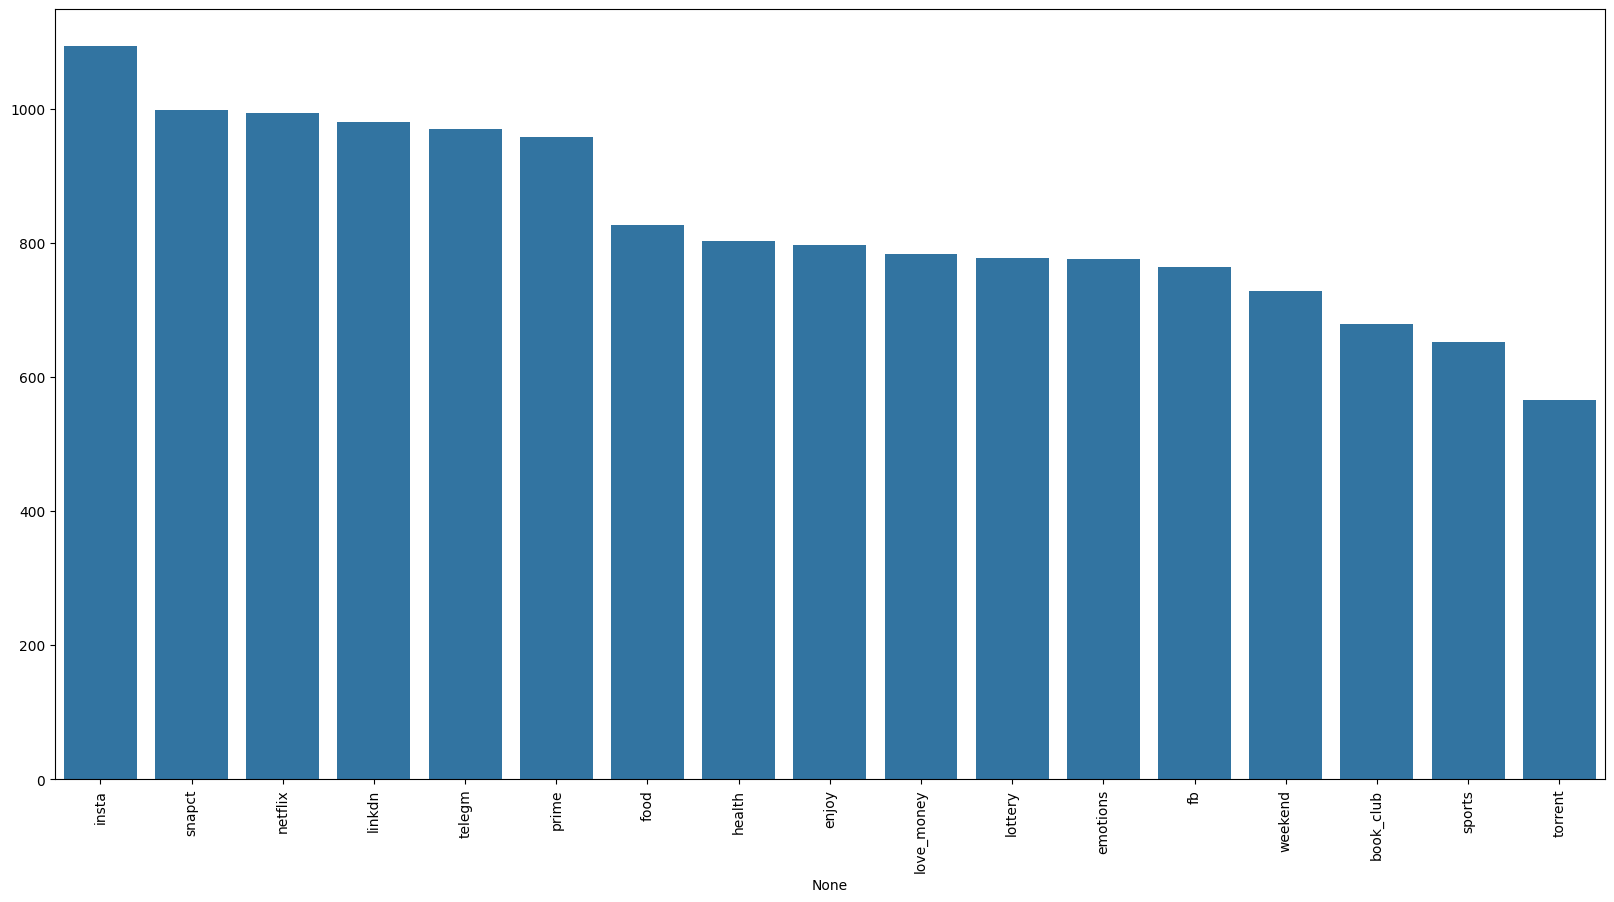

In [129]:
##Lets consider the top 20 selections freequently
r=z.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

<Figure size 1000x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Tree map')

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

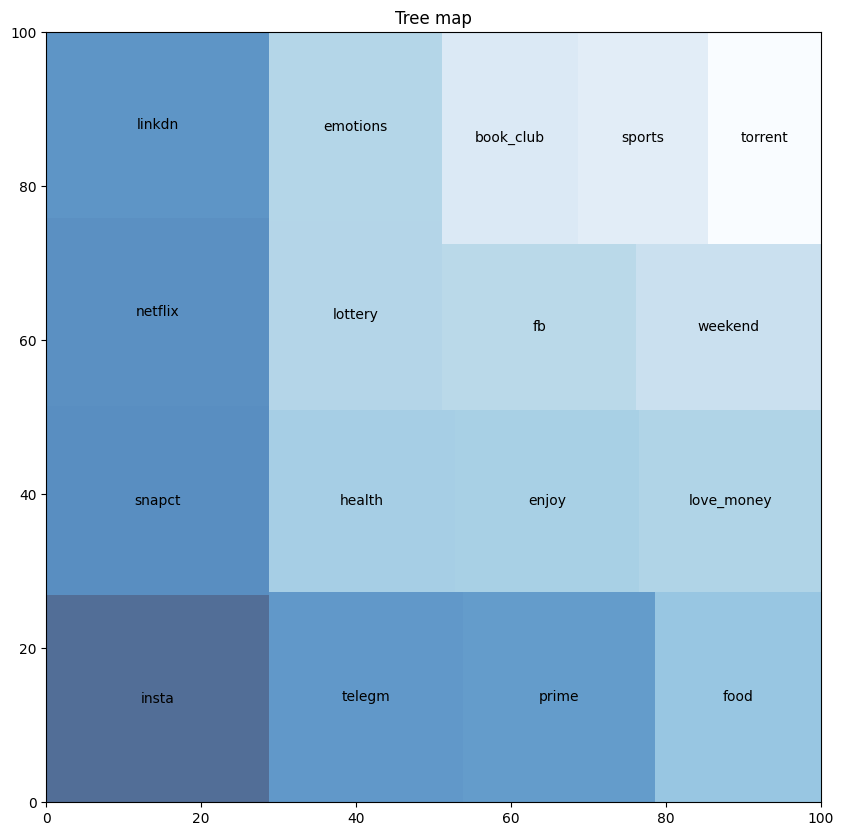

In [130]:
# create a color palette, mapped to these values
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map")
plt.axis('on')

In [131]:
#res=association_rules(z,metric="lift",min_threshold=1)
#res.head()

In [132]:
frequent_itemsets = apriori(z, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head(20)

,support,itemsets,length
0,0.755003,(insta),1
1,0.527260,(fb),1
2,0.688751,(snapct),1
3,0.676329,(linkdn),1
4,0.669427,(telegm),1
5,0.685990,(netflix),1
6,0.661146,(prime),1
7,0.390614,(torrent),1
8,0.502415,(weekend),1
9,0.535542,(emotions),1


In [133]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.50) ]

,support,itemsets,length
18,0.522429,"(snapct, insta)",2
19,0.501725,"(linkdn, insta)",2
21,0.521739,"(netflix, insta)",2
22,0.505176,"(prime, insta)",2


In [134]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.755003,(insta),1
1,0.527260,(fb),1
2,0.688751,(snapct),1
3,0.676329,(linkdn),1
4,0.669427,(telegm),1
5,0.685990,(netflix),1
6,0.661146,(prime),1
7,0.390614,(torrent),1
8,0.502415,(weekend),1
9,0.535542,(emotions),1


FP GROWTH TREE

In [135]:
from mlxtend.frequent_patterns import fpgrowth

In [136]:
#running the fpgrowth algorithm
res=fpgrowth(z,min_support=0.5,use_colnames=True)

In [137]:
res.head(20)

,support,itemsets
0,0.755003,(insta)
1,0.688751,(snapct)
2,0.685990,(netflix)
3,0.676329,(linkdn)
4,0.669427,(telegm)
5,0.661146,(prime)
6,0.570738,(food)
7,0.553485,(health)
8,0.550035,(enjoy)
9,0.541063,(love_money)


In [138]:
ser=association_rules(res,metric="lift",min_threshold=1)
ser.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(snapct),(insta),0.688751,0.755003,0.522429,0.758517,1.004654,1.0,0.002420,1.014550,0.014883,0.567041,0.014341,0.725237
1,(insta),(snapct),0.755003,0.688751,0.522429,0.691956,1.004654,1.0,0.002420,1.010405,0.018907,0.567041,0.010298,0.725237
2,(netflix),(insta),0.685990,0.755003,0.521739,0.760563,1.007364,1.0,0.003814,1.023221,0.023280,0.567568,0.022694,0.725803
3,(insta),(netflix),0.755003,0.685990,0.521739,0.691042,1.007364,1.0,0.003814,1.016351,0.029838,0.567568,0.016088,0.725803
4,(prime),(insta),0.661146,0.755003,0.505176,0.764092,1.012038,1.0,0.006009,1.038525,0.035102,0.554545,0.037096,0.716598


APRIORI VS FP GROWTH 

In [139]:
import time
l=[0.01,0.02,0.03,0.04]
t=[]
for i in l:
    t1=time.time()
    apriori(z,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.755003,(insta)
1,0.527260,(fb)
2,0.688751,(snapct)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
55994,0.012422,"(fb, insta, snapct, linkdn, netflix, lottery, ..."
55995,0.011042,"(telegm, torrent, insta, snapct, linkdn, netfl..."
55996,0.010352,"(telegm, torrent, insta, snapct, linkdn, netfl..."
55997,0.010352,"(telegm, insta, snapct, linkdn, netflix, lotte..."


,support,itemsets
0,0.755003,(insta)
1,0.527260,(fb)
2,0.688751,(snapct)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
30852,0.020014,"(telegm, fb, snapct, linkdn, netflix, lottery,..."
30853,0.020704,"(fb, snapct, linkdn, netflix, lottery, enjoy, ..."
30854,0.021394,"(telegm, snapct, linkdn, netflix, lottery, pri..."
30855,0.020014,"(telegm, snapct, linkdn, netflix, lottery, enj..."


,support,itemsets
0,0.755003,(insta)
1,0.527260,(fb)
2,0.688751,(snapct)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
18781,0.031746,"(telegm, snapct, linkdn, netflix, lottery, enj..."
18782,0.030366,"(snapct, linkdn, netflix, lottery, prime, heal..."
18783,0.033126,"(snapct, linkdn, netflix, lottery, enjoy, prim..."
18784,0.031746,"(snapct, linkdn, netflix, lottery, enjoy, prim..."


,support,itemsets
0,0.755003,(insta)
1,0.527260,(fb)
2,0.688751,(snapct)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
12764,0.044168,"(telegm, insta, snapct, linkdn, netflix, lotte..."
12765,0.040028,"(insta, snapct, linkdn, netflix, lottery, prim..."
12766,0.040718,"(insta, snapct, linkdn, netflix, lottery, enjo..."
12767,0.042788,"(insta, snapct, linkdn, netflix, lottery, prim..."


In [140]:
l=[0.01,0.02,0.03,0.04]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(z,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.755003,(insta)
1,0.688751,(snapct)
2,0.685990,(netflix)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
55994,0.012422,"(telegm, love_money, insta, sports, snapct, li..."
55995,0.046929,"(love_money, sports, snapct, linkdn, netflix, ..."
55996,0.043478,"(love_money, insta, sports, linkdn, netflix, w..."
55997,0.032436,"(love_money, insta, sports, snapct, linkdn, ne..."


,support,itemsets
0,0.755003,(insta)
1,0.688751,(snapct)
2,0.685990,(netflix)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
30852,0.028295,"(telegm, love_money, sports, snapct, linkdn, n..."
30853,0.046929,"(love_money, sports, snapct, linkdn, netflix, ..."
30854,0.043478,"(love_money, insta, sports, linkdn, netflix, w..."
30855,0.032436,"(love_money, insta, sports, snapct, linkdn, ne..."


,support,itemsets
0,0.755003,(insta)
1,0.688751,(snapct)
2,0.685990,(netflix)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
18781,0.036577,"(telegm, love_money, sports, linkdn, netflix, ..."
18782,0.046929,"(love_money, sports, snapct, linkdn, netflix, ..."
18783,0.043478,"(love_money, insta, sports, linkdn, netflix, w..."
18784,0.032436,"(love_money, insta, sports, snapct, linkdn, ne..."


,support,itemsets
0,0.755003,(insta)
1,0.688751,(snapct)
2,0.685990,(netflix)
3,0.676329,(linkdn)
4,0.669427,(telegm)
...,...,...
12764,0.040028,"(prime, love_money, sports, linkdn, netflix, w..."
12765,0.042098,"(telegm, love_money, sports, snapct, linkdn, w..."
12766,0.046929,"(love_money, sports, snapct, linkdn, netflix, ..."
12767,0.043478,"(love_money, insta, sports, linkdn, netflix, w..."


<Axes: >

<Axes: >

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

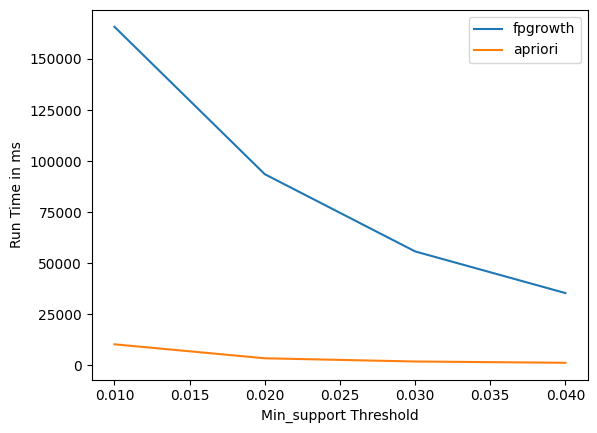

In [141]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

DECISION TREE

In [142]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [143]:
dt=z.drop(columns = ['weekend','emotions','food','health','enjoy','lottery','love_money','book_club','sports'])
dt.head()

,insta,fb,snapct,linkdn,telegm,netflix,prime,torrent
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,0,0,0,0,1,1,0
3,1,1,0,1,1,1,1,0
4,1,1,1,0,1,1,1,0


In [144]:
#split dataset in features and target variable
feature_cols = ['torrent', 'fb', 'snapct', 'linkdn','telegm','netflix','prime']
X = dt[feature_cols] # Features
y = dt.fb # Target variable

In [145]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [146]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #evaluating model

Accuracy: 1.0


VISUALIZATION OF DECISION TREE 

In [148]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

K MEANS CLUSTER

In [ ]:
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:

plt.figure(figsize=(15,7))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster of social media users')
plt.ylabel('age cluster')
plt.xlabel('active user (1.o) / inactive or semiactive <(1.0)')
plt.legend()
plt.show()
